<h1>Exploratory Data Analysis</h1>
<h2>State-Level West Nile Case Counts Between 1999-2020</h2>
https://www.cdc.gov/westnile/statsmaps/cumMapsData.html

In [4]:
import pandas as pd

In [18]:
import numpy as np
import matplotlib

In [58]:
df = pd.read_excel("C:\\Users\\ljens\\projects\\West Nile\\cases reported by state.xlsx")

In [59]:
df.head()

,State,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Alabama,0,0,2,49,37,16,10,8,24,...,5,62,9,2,9,19,60,28,5,9
1,Alaska,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,Arizona,0,0,0,0,13,391,113,150,97,...,69,133,62,107,103,78,111,26,174,12
3,Arkansas,0,0,0,43,25,28,28,29,20,...,1,64,18,11,18,9,18,8,9,1
4,California,0,0,0,1,3,779,880,278,380,...,158,479,379,801,783,442,553,217,225,235


This is called wide-form data. Pandas logic is designed to work with long-form data. Let's tidy it up

In [60]:
df = pd.DataFrame(df.set_index('State').stack())

In [61]:
df.rename(columns={0:'Cases'}, inplace=True)

In [62]:
df

Cases
State             
Alabama 1999     0
        2000     0
        2001     2
        2002    49
        2003    37
...            ...
Wyoming 2016    11
        2017     7
        2018     4
        2019     4
        2020     1

[1144 rows x 1 columns]

In [63]:
df['Cases'] = df['Cases'].astype('float')

In [64]:
df = df.reset_index().rename(columns = {'level_1':'Year'}).set_index(['State','Year'])

In [65]:
df

Cases
State   Year       
Alabama 1999    0.0
        2000    0.0
        2001    2.0
        2002   49.0
        2003   37.0
...             ...
Wyoming 2016   11.0
        2017    7.0
        2018    4.0
        2019    4.0
        2020    1.0

[1144 rows x 1 columns]

That looks better

In [66]:
nile_case_counts = df.copy()

'df' is commonly used to name the dataframe in active use. Let's save a copy and give it a more descriptive name

In [40]:
nile_case_counts

Cases
State              
Alabama 1999    0.0
        2000    0.0
        2001    2.0
        2002   49.0
        2003   37.0
...             ...
Wyoming 2016   11.0
        2017    7.0
        2018    4.0
        2019    4.0
        2020    1.0

[1144 rows x 1 columns]

<AxesSubplot: xlabel='State,None'>

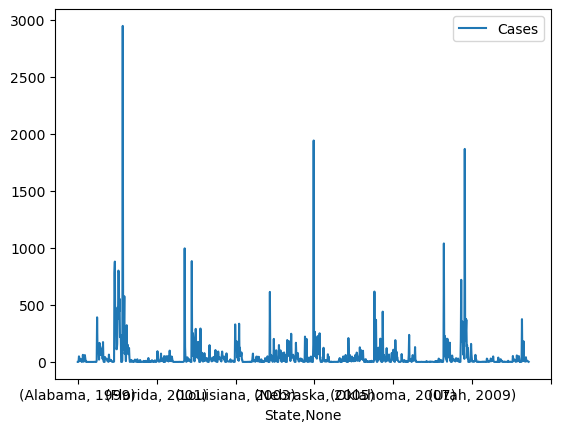

In [41]:
nile_case_counts.plot()

That's not helpful. Let's play around with the data until we create a more meaningful visualization

In [44]:
df.groupby('State')['Cases'].sum()

State
Alabama               375.0
Alaska                  2.0
Arizona              1940.0
Arkansas              352.0
California           7261.0
Colorado             5683.0
Connecticut           166.0
Delaware               52.0
Dist. of Columbia     125.0
Florida               455.0
Georgia               495.0
Hawaii                  1.0
Idaho                1384.0
Illinois             2704.0
Indiana               727.0
Iowa                  622.0
Kansas                685.0
Kentucky              194.0
Louisiana            1859.0
Maine                   5.0
Maryland              393.0
Massachusetts         218.0
Michigan             1350.0
Minnesota             825.0
Mississippi          1448.0
Missouri              620.0
Montana               622.0
Nebraska             4015.0
Nevada                428.0
New Hampshire           7.0
New Jersey            324.0
New Mexico            660.0
New York              995.0
North Carolina         83.0
North Dakota         1924.0
Ohio          

In [52]:
df.groupby('Year')['Cases'].sum()

Year
1999      62.0
2000      21.0
2001      66.0
2002    4156.0
2003    9862.0
2004    2539.0
2005    3000.0
2006    4269.0
2007    3630.0
2008    1356.0
2009     720.0
2010    1021.0
2011     712.0
2012    5674.0
2013    2469.0
2014    2205.0
2015    2175.0
2016    2149.0
2017    2097.0
2018    2647.0
2019     971.0
2020     731.0
Name: Cases, dtype: float64

In [55]:
import seaborn as sns

<AxesSubplot: xlabel='Year', ylabel='Cases'>

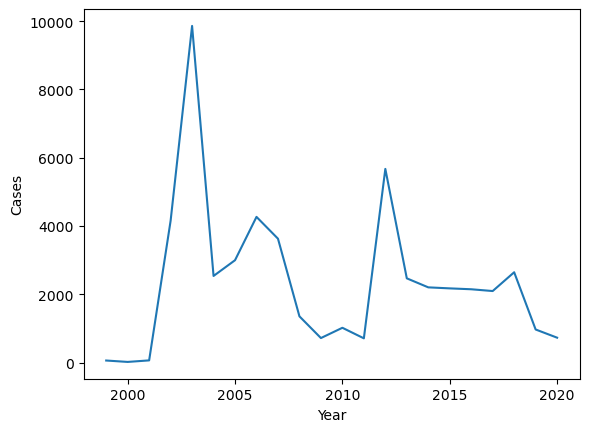

In [57]:
sns.lineplot(df.groupby('Year')['Cases'].sum())

This looks like a more meaningful graph. But wait! This is case-count data. We aren't seeing the whole picture because population varies between the states and over time. 

The next step will be to find state-level population data for each year. We can use that data to calculate West Nile incidence, which is a more meaningful measure